<a href="https://colab.research.google.com/github/LuisCarlos0907/PIA-TEAM-2-001.--Convolutional-Neural-Network-Training/blob/main/Final_Project_Team2/Final_Project_Team2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIA - IA - Convolutional Neural Network Training - A2023 - 001 - TEAM 2

TEAM 2
*   Victor Daniel Martinez Treviño    1946143
*   Mauricio Luna Escobedo            1915717
*   Luis carlos Treviño Aguirre       1946143

##Install Kaggle

In [ ]:
!pip install -q kaggle

##Import from Google Colab

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"victordanielmartinez","key":"c7157e358b1896b6fb50feed3ce1d252"}'}

##Create a Kaggle folder

In [ ]:
! mkdir ~/.kaggle

##Copy the kaggle.json to folder created

In [ ]:
! cp kaggle.json ~/.kaggle/

##Permission for the json to act

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

##Download image datasets from Kaggle

In [ ]:
!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset

 96% 187M/195M [00:01<00:00, 162MB/s]
100% 195M/195M [00:01<00:00, 182MB/s]


##Unzip files downloaded

In [ ]:
!unzip breast-ultrasound-images-dataset.zip

Archive:  breast-ultrasound-images-dataset.zip
  inflating: Dataset_BUSI_with_GT/benign/benign (1).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (1)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (10)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (100)_mask_1.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (101)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (102)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (103)_mask.png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104).png  
  inflating: Dataset_BUSI_with_GT/benign/benign (104)_mask.png  
  inflating: Data

##Import libraries

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import random

## Root directory

In [ ]:
base_dir = '/content/Dataset_BUSI_with_GT'

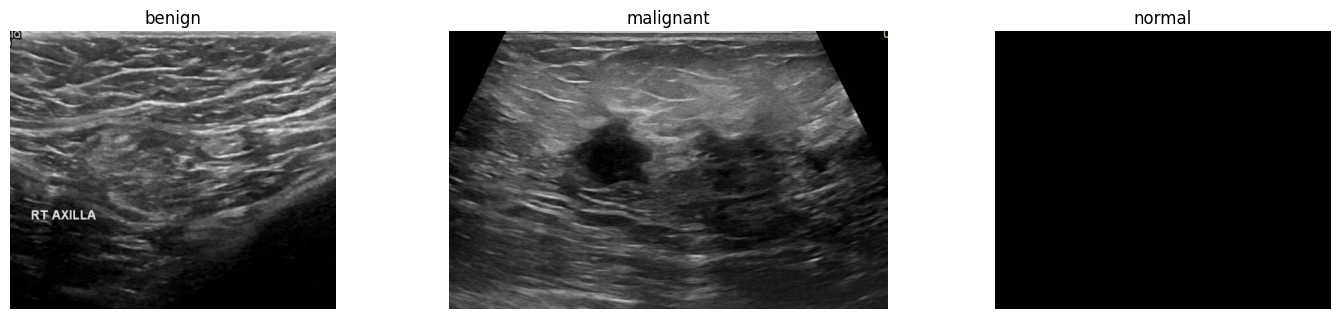

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

base_dir = '/content/Dataset_BUSI_with_GT'
categorias = ['benign', 'malignant', 'normal']
num_imagenes = 6

# Crear una lista para almacenar las imágenes y las etiquetas
imagenes = []
etiquetas = []

# Seleccionar imágenes aleatorias de cada categoría
for categoria in categorias:
    ruta_categoria = os.path.join(base_dir, categoria)
    rutas_imagenes = [os.path.join(ruta_categoria, img) for img in os.listdir(ruta_categoria) if os.path.isfile(os.path.join(ruta_categoria, img))]

    imagenes_aleatorias = random.sample(rutas_imagenes, min(len(rutas_imagenes), num_imagenes // len(categorias)))
    imagenes.extend(imagenes_aleatorias)
    etiquetas.extend([categoria] * len(imagenes_aleatorias))

# Mostrar solo las imágenes con índices impares
plt.figure(figsize=(15, 15))  # Ajustar el tamaño de la figura

# Crear un contador para los índices de subplots
contador_subplot = 1

for i, (ruta_imagen, etiqueta) in enumerate(zip(imagenes, etiquetas)):
    if i % 2 == 0:  # Verificar si el índice es par (lo que corresponde a una imagen impar)
        plt.subplot(5, 3, contador_subplot)  # Ajustar en una cuadrícula de 5x3
        imagen = Image.open(ruta_imagen)
        plt.imshow(imagen)
        plt.title(etiqueta)
        plt.axis('off')

        contador_subplot += 1  # Incrementar el contador de subplots

plt.tight_layout()
plt.show()


##Image preprocessing

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,  # 20% de los datos para validación
)

##Training generator

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Cambia a 'binary' si solo tienes dos categorías
    subset='training'
)

Found 1263 images belonging to 3 classes.


##Validation generator

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Cambia a 'binary' si solo tienes dos categorías
    subset='validation'
)

Found 315 images belonging to 3 classes.


##Defining the architecture of the model

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(3, activation='softmax')  # Ajusta el número de neuronas a la cantidad de clases
])

##Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Usa 'binary_crossentropy' para clasificación binaria
              metrics=['accuracy'])

##Training the model

In [ ]:
train_sample_count = train_generator.samples
validation_sample_count = validation_generator.samples

train_steps_per_epoch = train_sample_count // train_generator.batch_size
validation_steps = validation_sample_count // validation_generator.batch_size

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=30,  # Puedes ajustar este número según tus necesidades
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/30
39/39 [==============================] - 74s 2s/step - loss: 0.9249 - accuracy: 0.5134 - val_loss: 0.8786 - val_accuracy: 0.5590
Epoch 2/30
39/39 [==============================] - 71s 2s/step - loss: 0.8053 - accuracy: 0.6442 - val_loss: 0.6869 - val_accuracy: 0.6910
Epoch 3/30
39/39 [==============================] - 71s 2s/step - loss: 0.7514 - accuracy: 0.6629 - val_loss: 0.7049 - val_accuracy: 0.6910
Epoch 4/30
39/39 [==============================] - 70s 2s/step - loss: 0.7208 - accuracy: 0.6799 - val_loss: 0.6531 - val_accuracy: 0.7083
Epoch 5/30
39/39 [==============================] - 70s 2s/step - loss: 0.6826 - accuracy: 0.6816 - val_loss: 0.7540 - val_accuracy: 0.6562
Epoch 6/30
39/39 [==============================] - 70s 2s/step - loss: 0.6663 - accuracy: 0.6913 - val_loss: 0.6800 - val_accuracy: 0.7153
Epoch 7/30
39/39 [==============================] - 66s 2s/step - loss: 0.6630 - accuracy: 0.7124 - val_loss: 0.6870 - val_accuracy: 0.6806
Epoch 8/30
39/39 [==

##Evaluating the model

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print('Test accuracy:', test_acc)

10/10 - 7s - loss: 0.5657 - accuracy: 0.7587 - 7s/epoch - 652ms/step
Test accuracy: 0.7587301731109619


##Visualizing the training accuracy vs validation accuracy during the training of the CNN

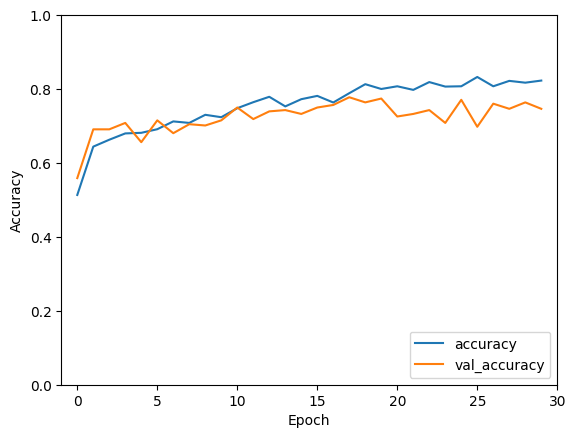

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.xlim([-1, 30])
plt.legend(loc='lower right')
plt.show()

# Predictions with the trained CNN

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    base_dir,  # Asegúrate de que esta ruta sea correcta
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # O 'binary' si es clasificación binaria
    shuffle=False
)

Found 1578 images belonging to 3 classes.


Realizar predicciones

In [ ]:
predictions = model.predict(test_generator)

50/50 [==============================] - 26s 513ms/step


Convertir predicciones de probabilidades a etiquetas de clase

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

Obtener etiquetas verdaderas del conjunto de prueba

In [ ]:
true_classes = test_generator.classes

Se nombran las clases dependiendo del numero obtenido del conjunto

In [ ]:
class_names = {0: "benign", 1: "Malignant", 2: "Normal"}

Comparar predicciones con etiquetas verdaderas

In [ ]:
for i in [10,11,12,13,14,1000,1001,1002,1003,1004,1500,1501,1502,1503,1504]:
    pred_label = class_names[predicted_classes[i]]
    true_label = class_names[true_classes[i]]
    print(f"La red dice que la imagen {i} es clase {pred_label} y la clase verdadera es: {true_label}")

La red dice que la imagen 10 es clase benign y la clase verdadera es: benign
La red dice que la imagen 11 es clase benign y la clase verdadera es: benign
La red dice que la imagen 12 es clase benign y la clase verdadera es: benign
La red dice que la imagen 13 es clase benign y la clase verdadera es: benign
La red dice que la imagen 14 es clase benign y la clase verdadera es: benign
La red dice que la imagen 1000 es clase benign y la clase verdadera es: Malignant
La red dice que la imagen 1001 es clase Malignant y la clase verdadera es: Malignant
La red dice que la imagen 1002 es clase Malignant y la clase verdadera es: Malignant
La red dice que la imagen 1003 es clase benign y la clase verdadera es: Malignant
La red dice que la imagen 1004 es clase Malignant y la clase verdadera es: Malignant
La red dice que la imagen 1500 es clase Normal y la clase verdadera es: Normal
La red dice que la imagen 1501 es clase Normal y la clase verdadera es: Normal
La red dice que la imagen 1502 es clas